In [23]:
import os

import numpy as np
import pandas as pd
from PIL import Image

import matplotlib.pyplot as plt

In [53]:
first_dir = 'output/exp10_output.csv'
second_dir = 'best.csv'
eval_dir = 'eval/images'

In [54]:
compare1 = pd.read_csv(first_dir)
compare2 = pd.read_csv(second_dir)

In [55]:
different = (compare1.ans != compare2.ans)

In [56]:
different_dir = compare1[different].ImageID
compare1_result = compare1[different].ans
compare2_result = compare2[different].ans

In [57]:
len(compare1_result)

1853

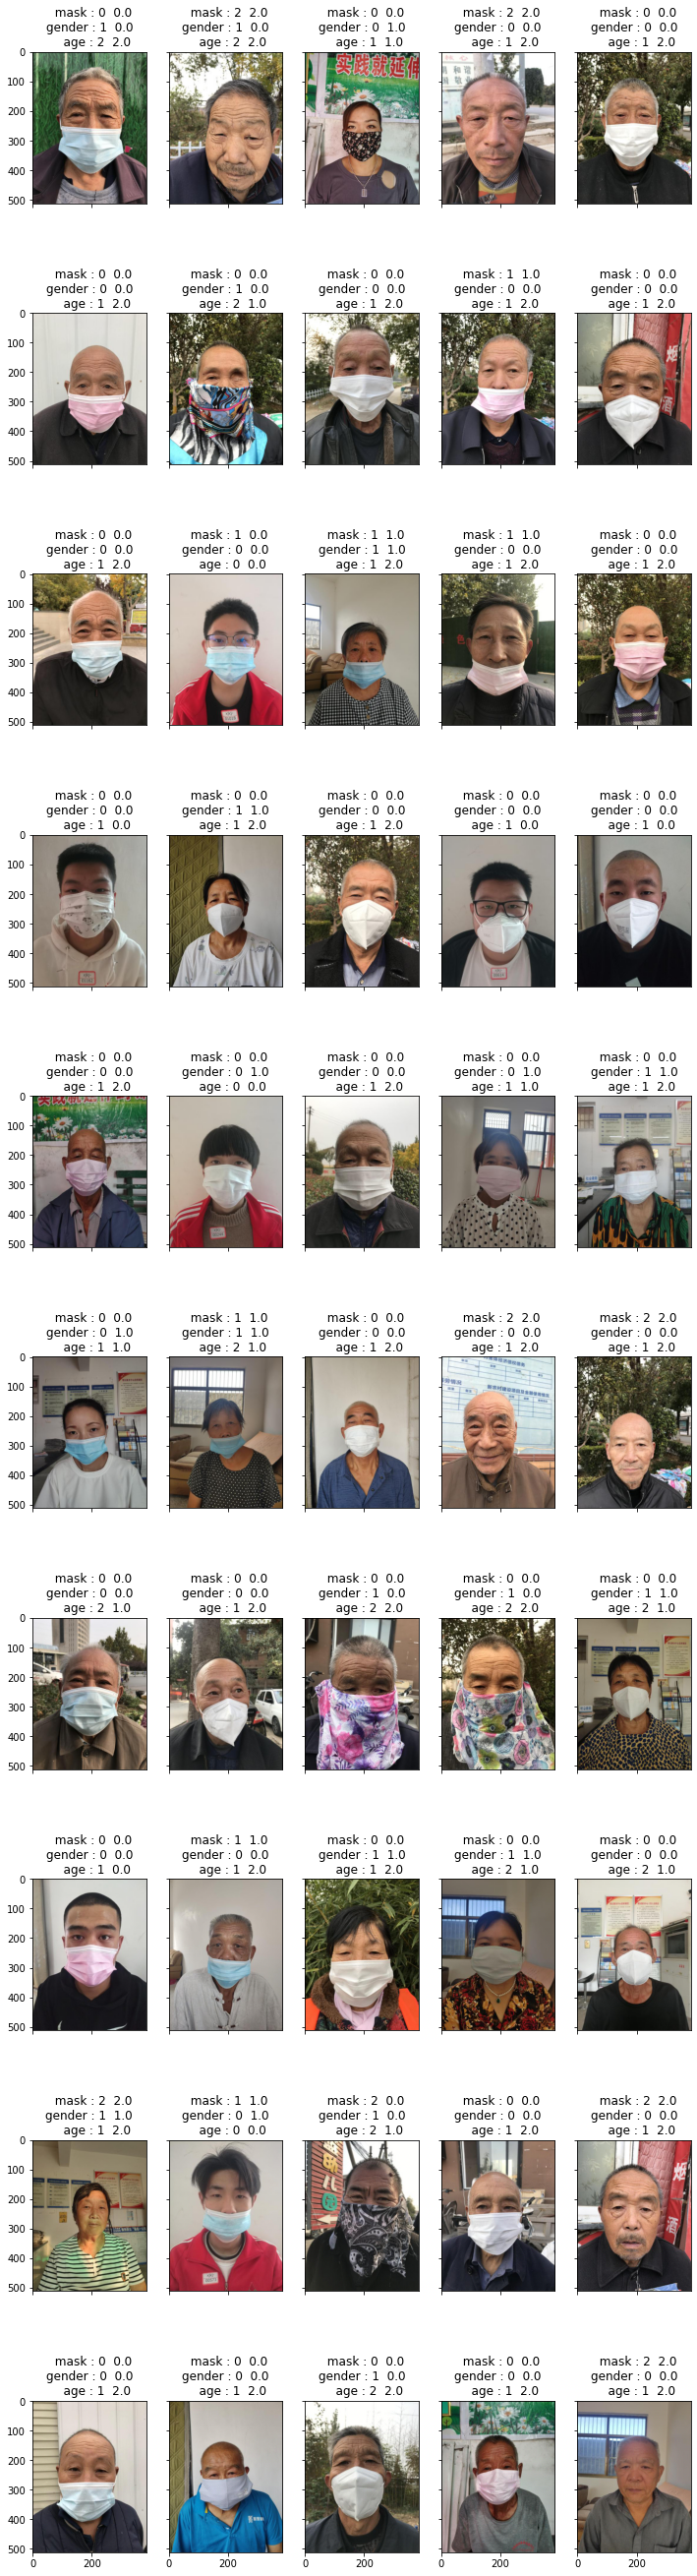

In [30]:
fig, axes = plt.subplots(10, 5, sharex=True, sharey=True, figsize=(12, 48))
axes = axes.flatten()
# cnt = 0
for idx, i in enumerate(different_dir.iloc[:]):
    image = np.array(Image.open(os.path.join(eval_dir, i)))
    new, old = compare1_result.iloc[idx], compare2_result.iloc[idx]
    mask_new, mask_old = new // 6, old // 6
    gender_new, gender_old = (new % 6) // 3, (old % 6) // 3
    age_new, age_old = (new % 6 % 3), (old % 6 % 3)
    # if age_new != age_old:
    axes[idx].set_title(f'  mask : {mask_new}  {mask_old}\ngender : {gender_new}  {gender_old}\n    age : {age_new}  {age_old}')
    axes[idx].imshow(image)
        # cnt += 1
    if idx == 49:
        break
# print(cnt)